<style>
    .zero-margin {
        margin: 0 px;
     }
</style>

<div class="zero-margin" style="text-align: center;">
    <p style="text-align: center; font-size: 20px; margin-bottom: 10px;">Practice Case 05<p>
    <p style="text-align: center; font-size: 45px; margin: 0px; font-weight: bold;text-transform: uppercase;">Unsupervised Learning</p>
    <p  style="text-align: center; margin-bottom: 0px;">Monday, November 11th 2019</p>
     <p  style="text-align: center; margin-top: 0px;">M. Haries Ramdhani</p>
</div>

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/pc05/train.csv")
df_test = pd.read_csv("../data/pc05/test.csv")

In [3]:
df = df.drop("att10", axis=1)

In [4]:
df = df.append(df_test)

In [5]:
# Preview of the data frame
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.16,0.82,6,202,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.43,0.48,2,153,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.39,0.54,2,127,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.73,1.00,5,253,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.44,0.46,2,149,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [6]:
# gives some infos on columns types and number of null values
df_info = pd.DataFrame(df.dtypes).rename(columns={0:'data_type'})
df_info["#_unique"] = df.nunique()
df_info["#_nan"] = df.isnull().sum().astype(int)
df_info["%_nan"] = df.isnull().sum()/df.shape[0]*100

df_info.sort_values(by="#_unique", ascending=False)

,data_type,#_unique,#_nan,%_nan
att4,int64,215,0,0.0
att1,float64,92,0,0.0
att2,float64,65,0,0.0
att5,int64,8,0,0.0
att3,int64,6,0,0.0
att8f,int64,2,0,0.0
att9b,int64,2,0,0.0
att9a,int64,2,0,0.0
att8j,int64,2,0,0.0
att8i,int64,2,0,0.0


From this table we understood the following:
1. `att7` and `att6` are binary features
2. As stated in the slide the att10 is the label for the supervised learning
3. `att8`, `att9` are dummified categorical variables. `att8` has 10~11 categories and `att9` has 3~4 categories
4. The test size is 0.2

## Data Exploration

In [7]:
continuous_features = ["att4", "att1", "att2", "att5"]

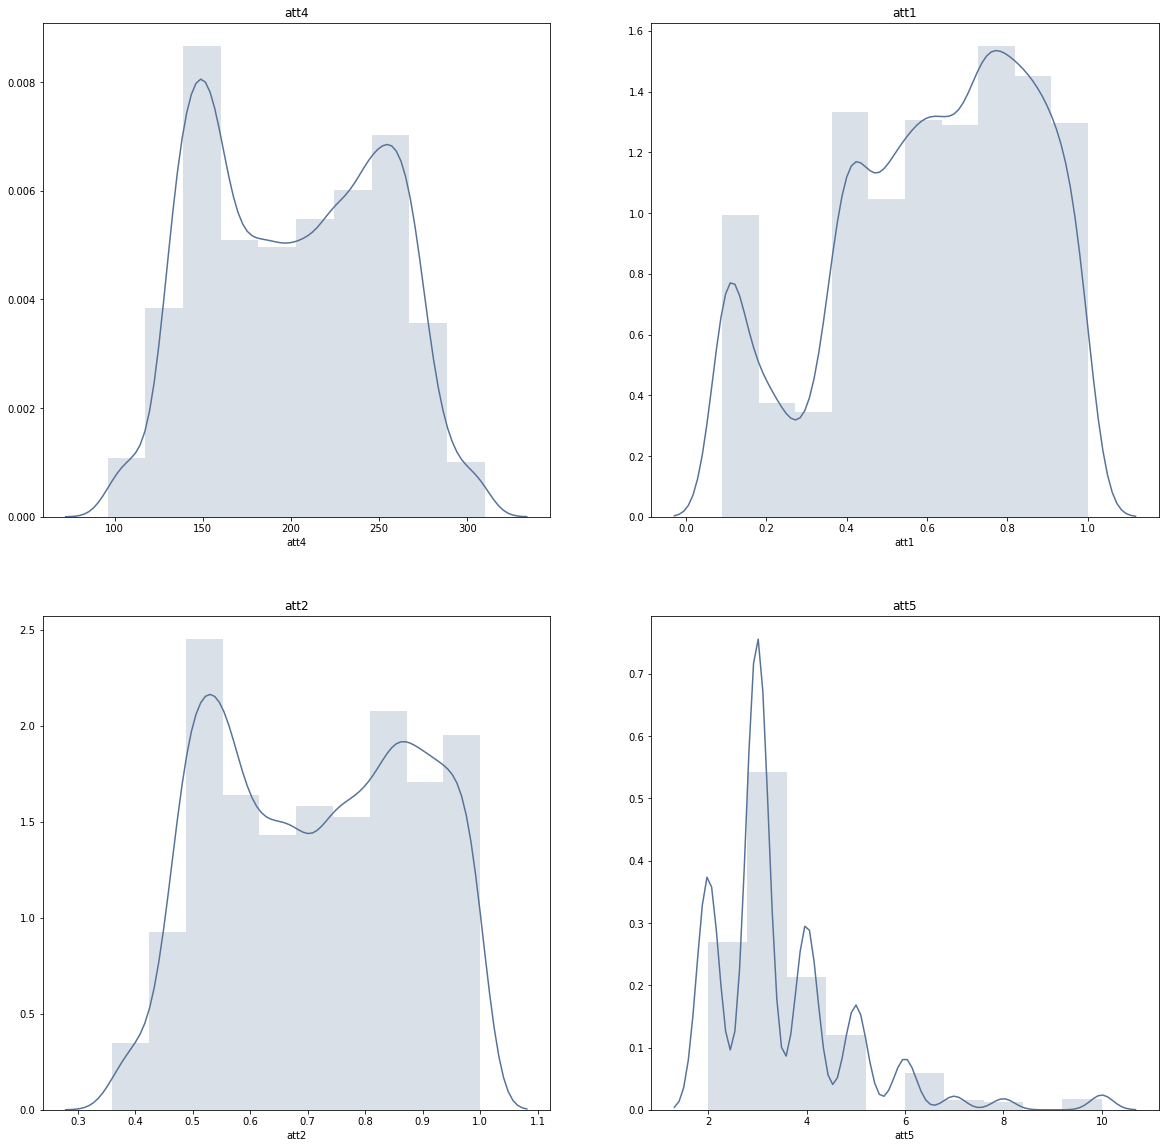

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(continuous_features):
        sns.distplot(df[continuous_features[i]], hist=True, bins=10, ax=ax, hist_kws={"color": '#A3B2C7'}, kde_kws={"color": "#577399"})
        ax.set_title(continuous_features[i]) 

plt.show()

In [14]:
X = df[["att1", "att2"]]

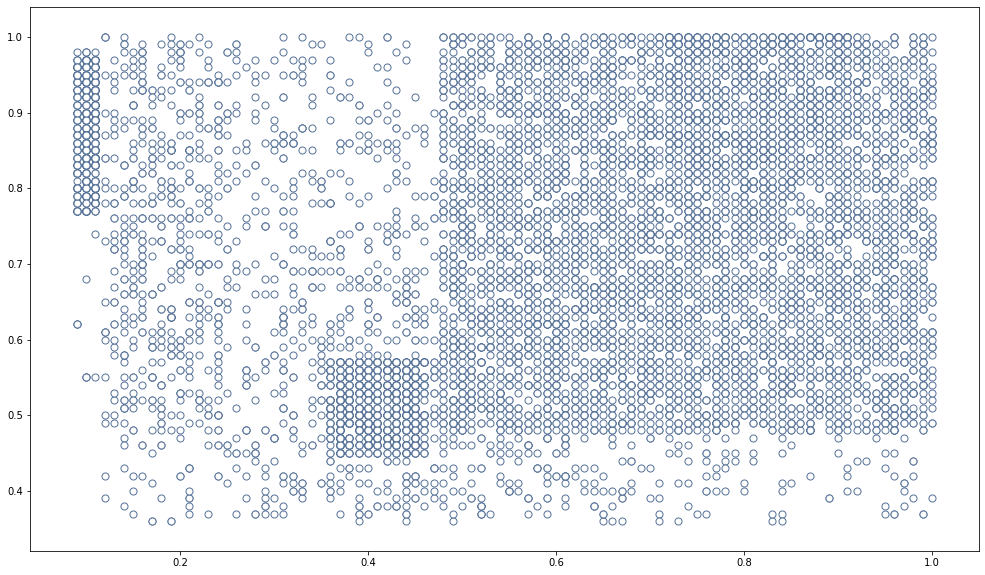

In [22]:
plt.figure(figsize=(17, 10))
plt.scatter(X["att1"], X["att2"], c='white', marker='o', edgecolor='#577399', s=50)
plt.show()

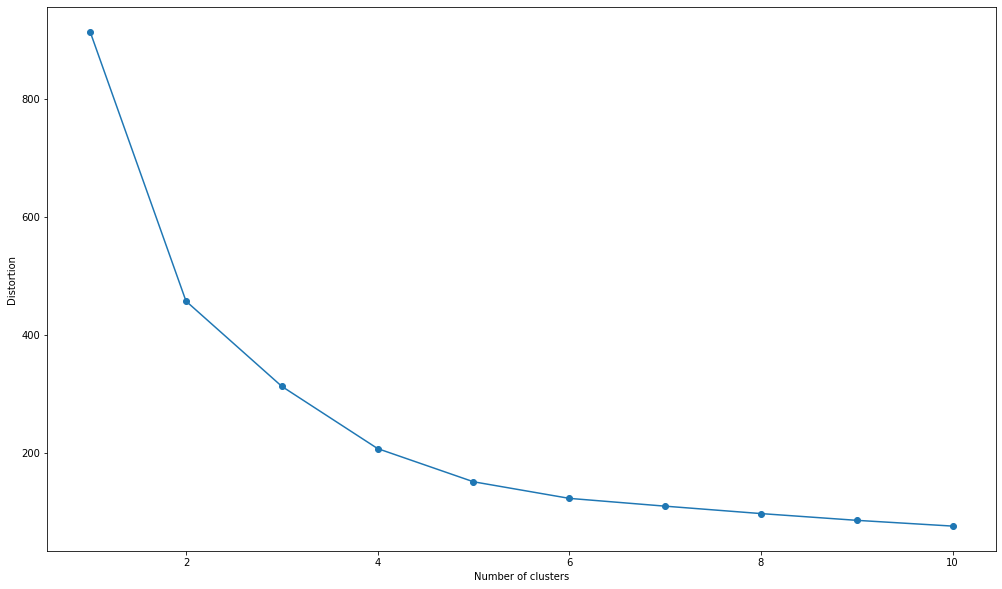

In [25]:
# calculate distortion for a range of number of cluster
plt.figure(figsize=(17, 10))
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

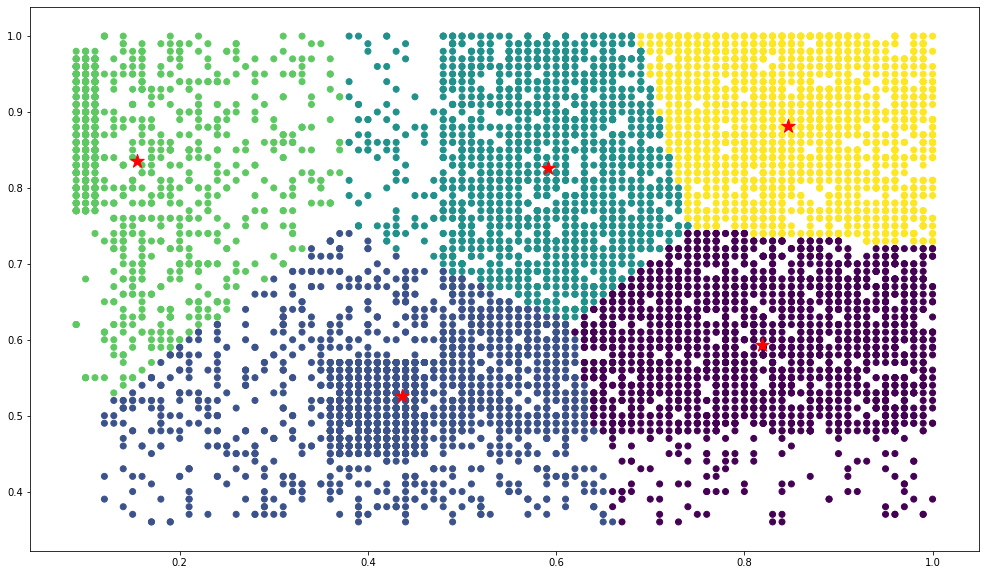

In [46]:
from sklearn.cluster import KMeans

# Scaling the data to normalize
kmeans = KMeans(n_clusters=5).fit(X)

# Visualize it:
plt.figure(figsize=(17, 10))
plt.scatter(X["att1"], X["att2"], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c="red")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

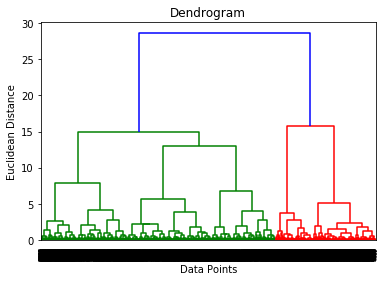

In [31]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

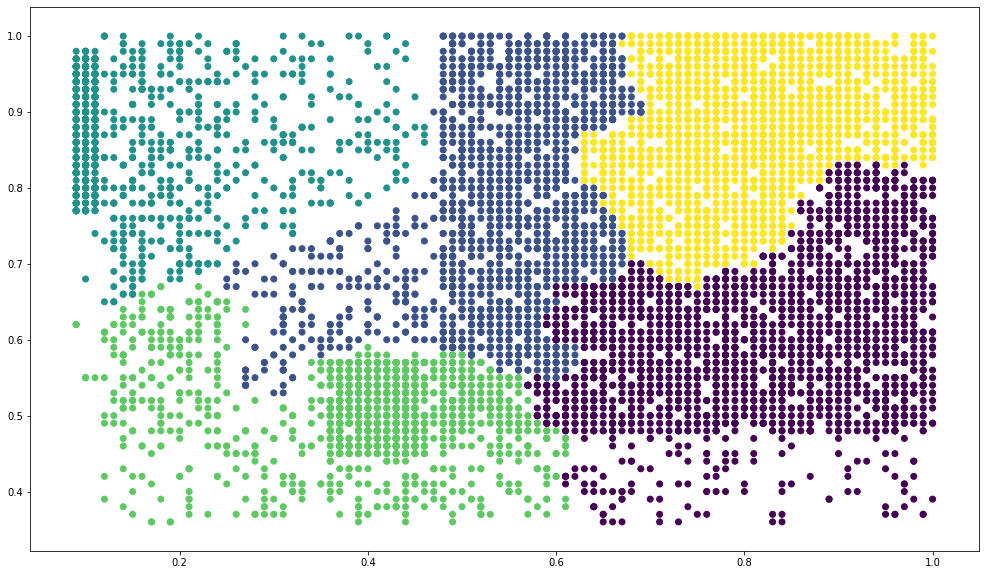

In [51]:
h_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
h_clustering.fit(X)

# Visualize it:
plt.figure(figsize=(17, 10))
plt.scatter(X["att1"], X["att2"], c=h_clustering.labels_.astype(float))
plt.show()

In [52]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [59]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

<Figure size 1224x720 with 0 Axes>

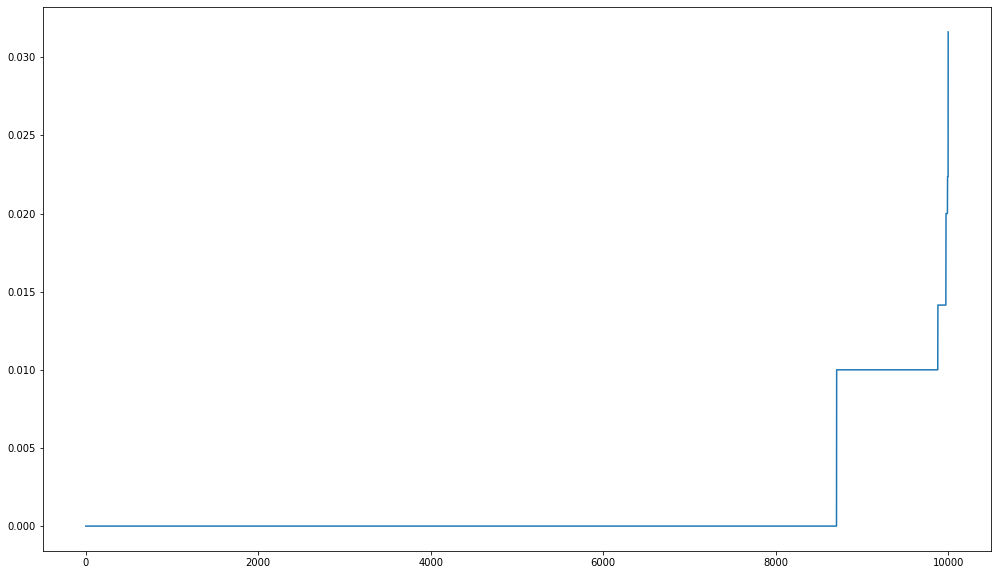

In [60]:
plt.figure(figsize=(17, 10))

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

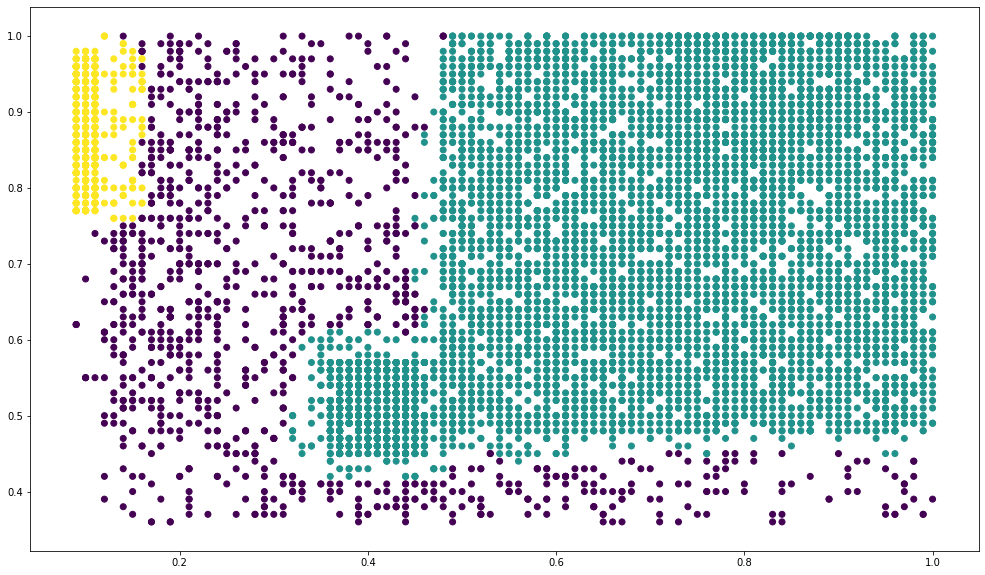

In [74]:
m = DBSCAN(eps=0.03, min_samples=50)
m.fit(X)

plt.figure(figsize=(17, 10))
plt.scatter(X["att1"], X["att2"], c=m.labels_)
plt.show()